In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import statistics 
from scipy.stats import norm 
from scipy.stats import chi2
from scipy.stats import cauchy

# Esercitazione 6

## Algoritmo di Metropolis

Fase di equilibrazione

Il concetto è che l'equilibrazione è difficile a basse temperature perchè io inizializzo il sistema con spin random ergo se vedo che alla temperatura più bassa già dopo 20 mosse il sistema è equilibrato sono praticamente in una botte di ferro se ogni blocco dura 20000, anche perchè io faccio il primo campionamento a $\mathrm{T^*}=2.0$ e poi scendo man mano di temperatura mettendo la configurazione finale del campionamento precedente come configurazione iniziale del nuovo campionamento ergo essenzialmente a ogni simulazione il sistema parte già equilibrato.

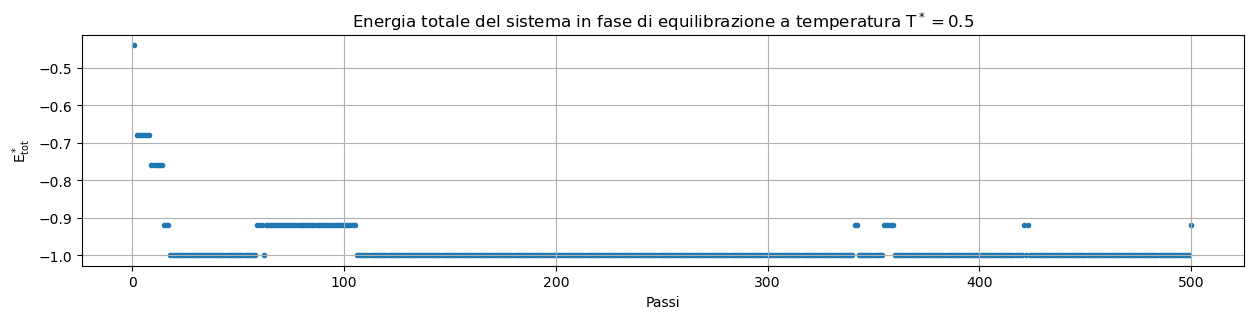

In [23]:
Neq=500  #passi della simulazione di equilibrazione
xeq=np.arange(Neq)+1  #Etot di equilibrazione la plotto in base agli steps, non faccio media a blocchi, faccio +1 perchè indicizza da 0 np.arange
Eeq=np.loadtxt("Risultati/eqtenergy.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati

plt.figure(figsize=(15, 3))
plt.scatter(xeq, Eeq, marker='.')
plt.xlabel("Passi")
plt.ylabel(r"$\mathrm{E_{tot}^*}$")
plt.title(r"Energia totale del sistema in fase di equilibrazione a temperatura $\mathrm{T^*}=0.5$")
plt.grid(True)
plt.show()

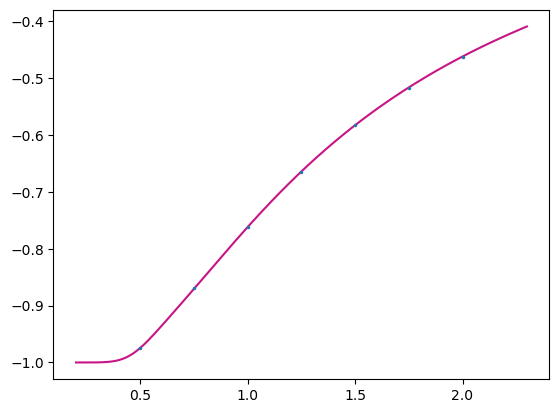

In [33]:
#provvisorio solo Energia
T=np.linspace(0.2, 2.3, 200)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

x, y, error=np.loadtxt("Risultati/metr_fin_toten.dat", usecols=(0, 1, 2),  unpack="true")  #vettore delle ordinate dei punti plottati


plt.plot(T, e, color="mediumvioletred")
plt.errorbar(x, y, yerr=error, fmt='o', linestyle='', elinewidth=0.5, ecolor="steelblue", markersize=1.5)
plt.show()


#va sicuramente trovato un modo grafico per mostrare l'errore, sarebbe carino fare modifiche al codice in modo che tutto avvenga autonomamente e in caso poi scriverlo nel notebook

## Algoritmo di Gibbs 